In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from pytest import approx

In [2]:
ref_file = 'data/GGHO_2023.05.30_THZ1_0001.txt'
sample_file = 'data/GGHO_2023.05.30_THZ1_0032.txt'

In [3]:
ref = np.loadtxt(fname=ref_file, delimiter=' ')
sample = np.loadtxt(fname=sample_file, delimiter=' ')

In [4]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref)
xf = fftfreq(N, T)

Text(0.5, 1.0, 'original data, columns 2 - 1, against column 0')

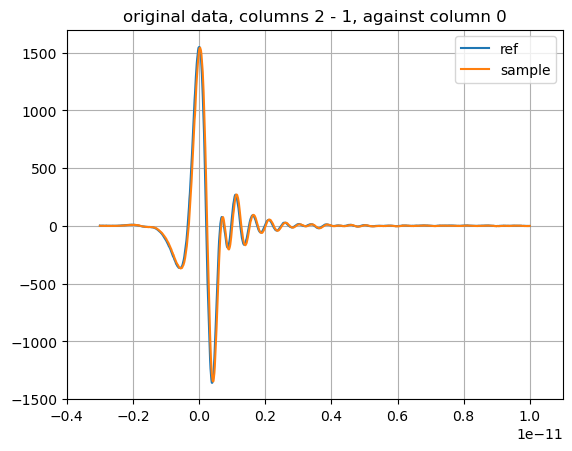

In [5]:
ref_2min1 = ref[:, 2] - ref[:, 1]
sample_2min1 = sample[:, 2] - sample[:, 1]
plt.plot(ref[:, 0], ref_2min1, label="ref")
plt.plot(sample[:, 0], sample_2min1, label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title('original data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'inverse of fft of data, columns 2 - 1, against column 0')

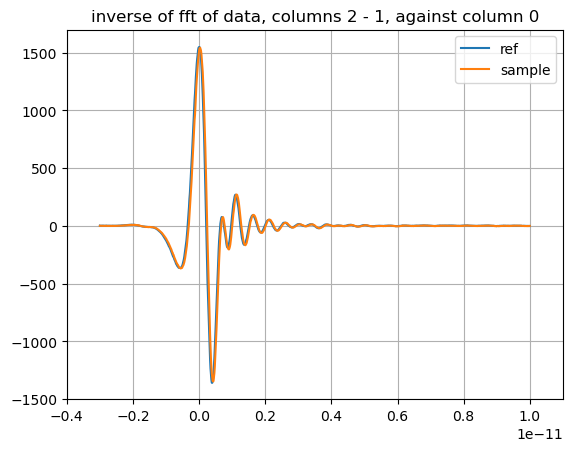

In [6]:
plt.plot(ref[:, 0], np.real(ifft(fft(ref_2min1))), label="ref")
plt.plot(sample[:, 0], np.real(ifft(fft(sample_2min1))), label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title('inverse of fft of data, columns 2 - 1, against column 0')